In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('beverageDataset.csv')

In [42]:
data.head(len(data))

,product,sugar,calories,protein,carbohydrate
0,Milklife Chocolate UHT,19,150,5.00,23
1,Nutriboost Mangga,31,170,2.00,37
2,Bearbrand Susu Steril,9,120,6.00,9
3,Milku stroberi,22,150,6.00,22
4,L-Men 2 Go,9,120,12.00,12
5,Golda Dolce latte coffee,15,120,2.00,22
6,Coffee Oat Milk - Oatside,10,154,2.00,21
7,Oat Side Full Cream - Oatside,6,130,1.00,16
8,Diamond Susu UHT Full Cream,6,120,6.00,10
9,Vsoy Cocoa,14,177,9.00,21


In [43]:
data.describe()

,sugar,calories,protein,carbohydrate
count,14.000000,14.000000,14.000000,14.000000
mean,13.071429,132.000000,5.230000,17.714286
std,8.033241,36.959437,3.659632,8.023318
min,1.000000,57.000000,0.220000,5.000000
25%,8.250000,120.000000,2.000000,12.500000
50%,10.500000,140.000000,5.500000,18.500000
75%,18.000000,153.000000,6.750000,22.000000
max,31.000000,177.000000,12.000000,37.000000


In [44]:
plt.style.use('ggplot')

<Axes: xlabel='product'>

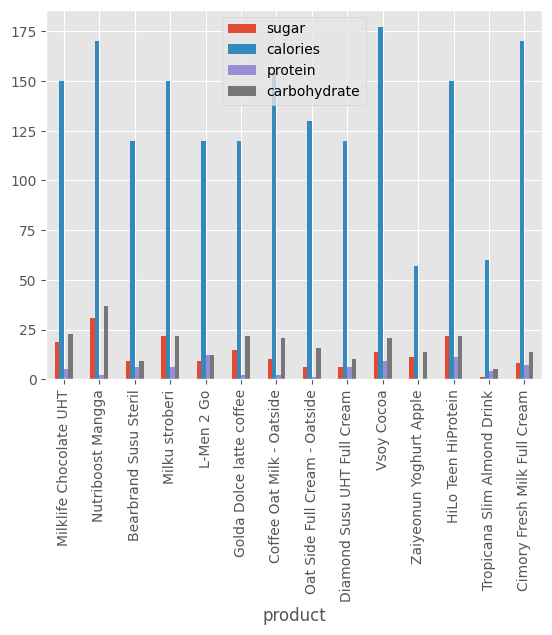

In [45]:
data.plot(kind='bar', x='product')

In [46]:
menu = data.values.tolist()
menu

[['Milklife Chocolate UHT', 19, 150, 5.0, 23],
 ['Nutriboost Mangga', 31, 170, 2.0, 37],
 ['Bearbrand Susu Steril', 9, 120, 6.0, 9],
 ['Milku stroberi', 22, 150, 6.0, 22],
 ['L-Men 2 Go', 9, 120, 12.0, 12],
 ['Golda Dolce latte coffee', 15, 120, 2.0, 22],
 ['Coffee Oat Milk - Oatside', 10, 154, 2.0, 21],
 ['Oat Side Full Cream - Oatside', 6, 130, 1.0, 16],
 ['Diamond Susu UHT Full Cream', 6, 120, 6.0, 10],
 ['Vsoy Cocoa', 14, 177, 9.0, 21],
 ['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
 ['HiLo Teen HiProtein', 22, 150, 11.0, 22],
 ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
 ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]]

In [47]:
sugar_limit = 25

In [48]:
def power_set(set_):
    """Binary powerset algorithm."""
    power_set = []
    
    power_cardinality = 2**len(set_)
    
    # the number of binary digits needed
    digit_count = len(set_)
    
    # setting up the formatting
    format_spec = '0' + str(digit_count) + 'b' 
    
    for n in range(power_cardinality):
        subset = []
        
        binary_n = format(n, format_spec)
        
        # for every character in a binary number
        for i, char in enumerate(binary_n):
            if char == '1':
                # when char is 1, the element in set_ with matching index is present in the subset
                subset.append(set_[i])
                
        power_set.append(subset)
    
    return power_set

In [49]:
menu_power = power_set(menu)
menu_power

[[],
 [['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['Tropicana Slim Almond Drink', 1, 60, 4.0, 5]],
 [['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
  ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['HiLo Teen HiProtein', 22, 150, 11.0, 22]],
 [['HiLo Teen HiProtein', 22, 150, 11.0, 22],
  ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['HiLo Teen HiProtein', 22, 150, 11.0, 22],
  ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5]],
 [['HiLo Teen HiProtein', 22, 150, 11.0, 22],
  ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
  ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14]],
 [['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
  ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
  ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5]],
 [['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
  ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
  ['Cimory Fresh Milk Full Cream', 8, 17

In [50]:
def total_value(choice):
    """(list) -> int
    Given a list of foods, returns the sum of their values."""
    total_value = 0
    for food in choice:
        total_value += food[3]
    return total_value

In [51]:
# Define valid_choices based on kkal_limit
valid_choices = [choice for choice in menu_power if sum(item[1] for item in choice) <= sugar_limit]

# Sort the valid choices by total value
sorted_choices = sorted(valid_choices, key=total_value, reverse=True)

print("The optimal menu choice is", sorted_choices[0])

The optimal menu choice is [['L-Men 2 Go', 9, 120, 12.0, 12], ['Diamond Susu UHT Full Cream', 6, 120, 6.0, 10], ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5], ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]]


In [52]:
print("Total protein:", total_value(sorted_choices[0]))

Total protein: 29.0


In [53]:
total_cost = 0
for food in sorted_choices[0]:
    total_cost += food[1]

print("Total sugar:", total_cost)

Total sugar: 24


MENCARI DENGAN GREEDY

In [54]:
menu

[['Milklife Chocolate UHT', 19, 150, 5.0, 23],
 ['Nutriboost Mangga', 31, 170, 2.0, 37],
 ['Bearbrand Susu Steril', 9, 120, 6.0, 9],
 ['Milku stroberi', 22, 150, 6.0, 22],
 ['L-Men 2 Go', 9, 120, 12.0, 12],
 ['Golda Dolce latte coffee', 15, 120, 2.0, 22],
 ['Coffee Oat Milk - Oatside', 10, 154, 2.0, 21],
 ['Oat Side Full Cream - Oatside', 6, 130, 1.0, 16],
 ['Diamond Susu UHT Full Cream', 6, 120, 6.0, 10],
 ['Vsoy Cocoa', 14, 177, 9.0, 21],
 ['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
 ['HiLo Teen HiProtein', 22, 150, 11.0, 22],
 ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
 ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]]

In [55]:
# Sorting gula terbanyak
by_cost = sorted(menu, key=lambda food: food[1], reverse=True)
by_cost

[['Nutriboost Mangga', 31, 170, 2.0, 37],
 ['Milku stroberi', 22, 150, 6.0, 22],
 ['HiLo Teen HiProtein', 22, 150, 11.0, 22],
 ['Milklife Chocolate UHT', 19, 150, 5.0, 23],
 ['Golda Dolce latte coffee', 15, 120, 2.0, 22],
 ['Vsoy Cocoa', 14, 177, 9.0, 21],
 ['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
 ['Coffee Oat Milk - Oatside', 10, 154, 2.0, 21],
 ['Bearbrand Susu Steril', 9, 120, 6.0, 9],
 ['L-Men 2 Go', 9, 120, 12.0, 12],
 ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14],
 ['Oat Side Full Cream - Oatside', 6, 130, 1.0, 16],
 ['Diamond Susu UHT Full Cream', 6, 120, 6.0, 10],
 ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5]]

In [57]:
# Sorting protein terbanyak
by_value = sorted(menu, key=lambda food: food[3], reverse=True)
by_value

[['L-Men 2 Go', 9, 120, 12.0, 12],
 ['HiLo Teen HiProtein', 22, 150, 11.0, 22],
 ['Vsoy Cocoa', 14, 177, 9.0, 21],
 ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14],
 ['Bearbrand Susu Steril', 9, 120, 6.0, 9],
 ['Milku stroberi', 22, 150, 6.0, 22],
 ['Diamond Susu UHT Full Cream', 6, 120, 6.0, 10],
 ['Milklife Chocolate UHT', 19, 150, 5.0, 23],
 ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
 ['Nutriboost Mangga', 31, 170, 2.0, 37],
 ['Golda Dolce latte coffee', 15, 120, 2.0, 22],
 ['Coffee Oat Milk - Oatside', 10, 154, 2.0, 21],
 ['Oat Side Full Cream - Oatside', 6, 130, 1.0, 16],
 ['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14]]

In [58]:
by_ratio = sorted(menu, key=lambda food: food[3]/food[1], reverse=True)
by_ratio

[['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
 ['L-Men 2 Go', 9, 120, 12.0, 12],
 ['Diamond Susu UHT Full Cream', 6, 120, 6.0, 10],
 ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14],
 ['Bearbrand Susu Steril', 9, 120, 6.0, 9],
 ['Vsoy Cocoa', 14, 177, 9.0, 21],
 ['HiLo Teen HiProtein', 22, 150, 11.0, 22],
 ['Milku stroberi', 22, 150, 6.0, 22],
 ['Milklife Chocolate UHT', 19, 150, 5.0, 23],
 ['Coffee Oat Milk - Oatside', 10, 154, 2.0, 21],
 ['Oat Side Full Cream - Oatside', 6, 130, 1.0, 16],
 ['Golda Dolce latte coffee', 15, 120, 2.0, 22],
 ['Nutriboost Mangga', 31, 170, 2.0, 37],
 ['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14]]

In [61]:
def order_to_limit(menu, criteria):
    """(list, str) -> None
    Given a menu, orders as many items as possible (until reaching CALORIE_LIMIT).
    Prints the results."""
    cost = 0
    value = 0
    ordered = []
    for food in menu:
        f_cost = food[1]
        f_value = food[3]
        f_name = food[0]
        
        # If the calorie cost + calories already consumed does not exceed limit
        if ((cost + f_cost) < sugar_limit):
            # Order the food
            cost += f_cost
            value += f_value
            ordered.append(f_name)
    
    print("With {} criteria:".format(criteria))
    print("    food ordered:", ordered)
    print("    total sugar:", cost)
    print("    total protein:", value)

In [62]:
order_to_limit(by_value, "VALUE")
print()
order_to_limit(by_cost, "COST")
print()
order_to_limit(by_ratio, "RATIO")

With VALUE criteria:
    food ordered: ['L-Men 2 Go', 'Vsoy Cocoa', 'Tropicana Slim Almond Drink']
    total sugar: 24
    total protein: 25.0

With COST criteria:
    food ordered: ['Milku stroberi', 'Tropicana Slim Almond Drink']
    total sugar: 23
    total protein: 10.0

With RATIO criteria:
    food ordered: ['Tropicana Slim Almond Drink', 'L-Men 2 Go', 'Diamond Susu UHT Full Cream', 'Cimory Fresh Milk Full Cream']
    total sugar: 24
    total protein: 29.0


Plotting the Search Space

In [63]:
valid_choices

[[],
 [['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['Tropicana Slim Almond Drink', 1, 60, 4.0, 5]],
 [['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
  ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['HiLo Teen HiProtein', 22, 150, 11.0, 22]],
 [['HiLo Teen HiProtein', 22, 150, 11.0, 22],
  ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5]],
 [['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14]],
 [['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
  ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
  ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5]],
 [['Zaiyeonun Yoghurt Apple', 11, 57, 0.22, 14],
  ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5],
  ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['Vsoy Cocoa', 14, 177, 9.0, 21]],
 [['Vsoy Cocoa', 14, 177, 9.0, 21],
  ['Cimory Fresh Milk Full Cream', 8, 170, 7.0, 14]],
 [['Vsoy Cocoa', 14, 177, 9.0, 21],
  ['Tropicana Slim Almond Drink', 1, 60, 4.0, 5]],
 [['Vsoy Cocoa', 14, 1

In [64]:
summed_values = []

for s in valid_choices:
    summed_values.append(total_value(s))

In [68]:
summed_values = pd.Series(summed_values)
summed_values

0       0.0
1       7.0
2       4.0
3      11.0
4      11.0
       ... 
121    23.0
122     5.0
123     9.0
124    11.0
125     6.0
Length: 126, dtype: float64

[Text(0.5, 0, 'Product # / Item #'), Text(0, 0.5, 'Total value')]

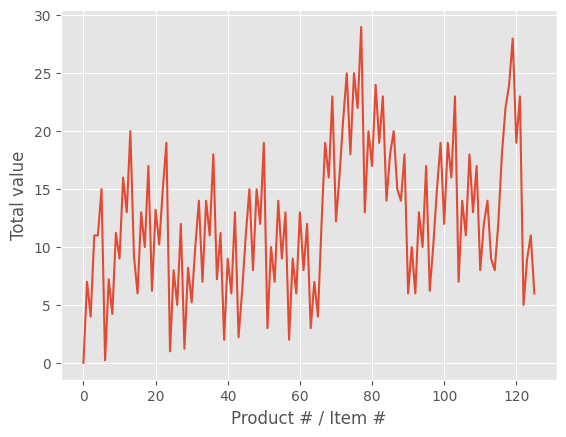

In [72]:
value_plot = summed_values.plot()
value_plot.set(xlabel="Product # / Item #", ylabel="Total value")


In [73]:
def total_cost(choice):
    total_cost = 0
    for food in choice:
        total_cost += food[1]
    return total_cost

In [74]:
summed_costs = []

for s in valid_choices:
    summed_costs.append(total_cost(s))

summed_costs

[0,
 8,
 1,
 9,
 22,
 23,
 11,
 19,
 12,
 20,
 14,
 22,
 15,
 23,
 25,
 6,
 14,
 7,
 15,
 17,
 25,
 18,
 20,
 21,
 6,
 14,
 7,
 15,
 17,
 25,
 18,
 20,
 21,
 12,
 20,
 13,
 21,
 23,
 24,
 10,
 18,
 11,
 19,
 21,
 22,
 24,
 25,
 16,
 24,
 17,
 25,
 16,
 24,
 17,
 25,
 22,
 23,
 15,
 23,
 16,
 24,
 21,
 22,
 21,
 22,
 25,
 9,
 17,
 10,
 18,
 20,
 21,
 23,
 24,
 15,
 23,
 16,
 24,
 15,
 23,
 16,
 24,
 21,
 22,
 19,
 20,
 25,
 25,
 24,
 25,
 22,
 23,
 9,
 17,
 10,
 18,
 20,
 21,
 23,
 24,
 15,
 23,
 16,
 24,
 15,
 23,
 16,
 24,
 21,
 22,
 19,
 20,
 25,
 25,
 24,
 25,
 18,
 19,
 24,
 25,
 24,
 25,
 19,
 20,
 25,
 25]

In [75]:
cost_value_data = pd.DataFrame({'Total pleasure': summed_values, 'Total cost': summed_costs})
cost_value_data

,Total pleasure,Total cost
0,0.0,0
1,7.0,8
2,4.0,1
3,11.0,9
4,11.0,22
...,...,...
121,23.0,25
122,5.0,19
123,9.0,20
124,11.0,25


[Text(0.5, 0, 'Order #'), Text(0, 0.5, 'Total value')]

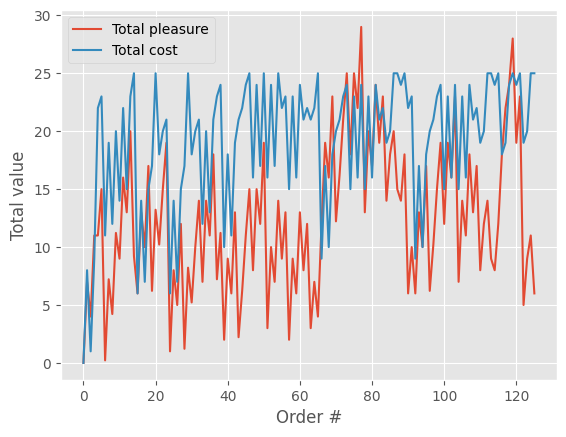

In [76]:
cvp = cost_value_data.plot()
cvp.set(xlabel="Order #", ylabel="Total value")